In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from joblib import dump, load

In [2]:
obs = load('TSdataObs.joblib') 

In [3]:
t1=obs.time
t1

<xarray.DataArray 'time' (time: 2418)>
array(['1980-01-01T00:00:00.000000000', '1980-01-02T00:00:00.000000000',
       '1980-01-03T00:00:00.000000000', ..., '2018-12-29T00:00:00.000000000',
       '2018-12-30T00:00:00.000000000', '2018-12-31T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 1980-01-01 1980-01-02 ... 2018-12-31

In [4]:
AOData = xr.open_dataset('../../../../Data/AO_EU/AO_Calculated.nc')
aoTS=AOData.AO
ao=aoTS[((aoTS.time.dt.month>11) | (aoTS.time.dt.month<2)) & 
        (aoTS.time.dt.year<2020)].sel(time=slice('1980-1-1','2018-12-31'))


In [5]:
ao

<xarray.DataArray 'AO' (time: 2418)>
array([-1.824208, -1.439631, -0.997704, ...,  0.216663,  0.219727,  0.342262],
      dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1980-01-01T09:00:00 ... 2018-12-31T09:00:00

In [6]:
# sst data
sstData=xr.open_dataset('../../../../Data/eraDown/ERA5_2degree_Down/DailyMean/AnomERA5_sst_daily.nc')
sst1=sstData.sst.sel(latitude=slice(5,-5),longitude=slice(-170%360,-120%360)) # nino3.4 region 5S-5N 170W-120W
sstTS=sst1.mean(dim=['latitude','longitude'], skipna=True) 
sst=sstTS[((sstTS.time.dt.month>11) | (sstTS.time.dt.month<2)) & 
        (sstTS.time.dt.year<2020)].sel(time=slice('1980-1-1','2018-12-31'))
#sst

In [7]:
EUData = xr.open_dataset('../../../../Data/AO_EU/EU.nc')
euTS=EUData.EUVal
eu=euTS[((euTS.time.dt.month>11) | (euTS.time.dt.month<2)) & 
        (euTS.time.dt.year<2020)].sel(time=slice('1980-1-1','2018-12-31'))
#eu

In [8]:
FivedayMeanEU=euTS.rolling(time=5).mean()

In [9]:
FivedayMeanAO=aoTS.rolling(time=5).mean()

In [10]:
FivedayMeanSST=sstTS.rolling(time=30).mean()

In [11]:
days=np.arange(62)

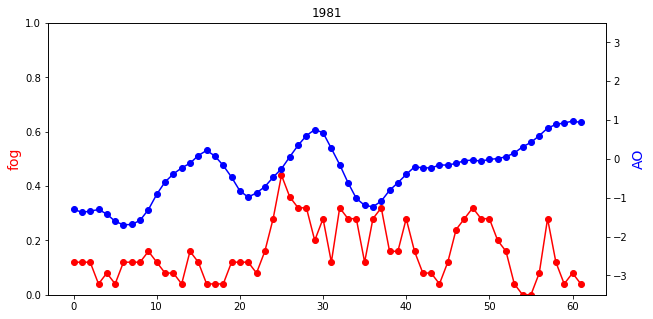

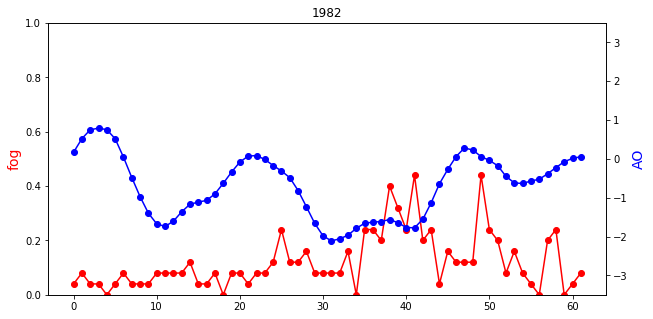

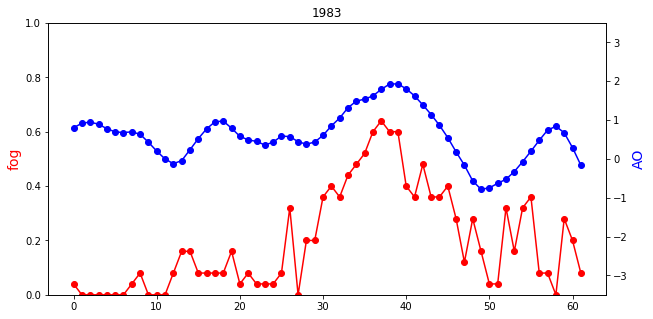

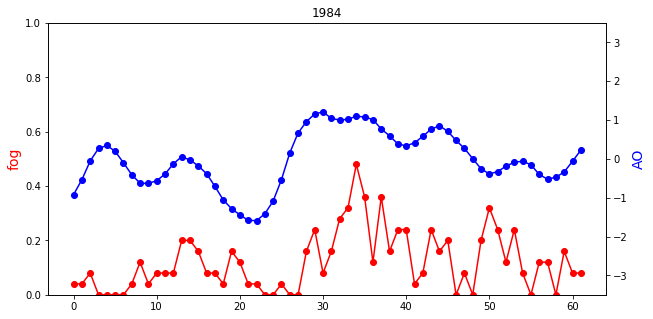

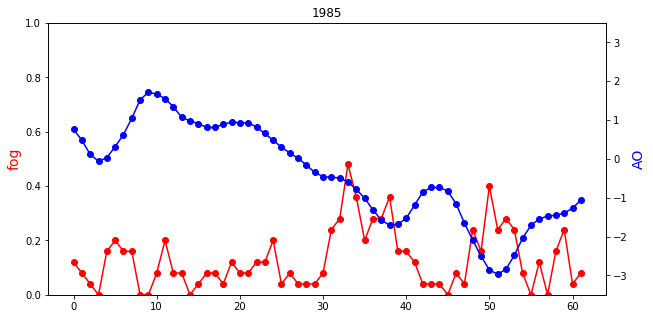

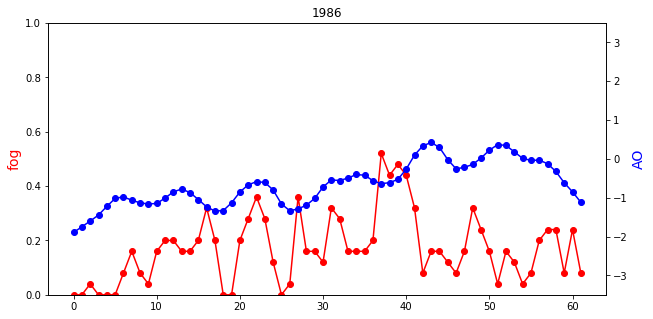

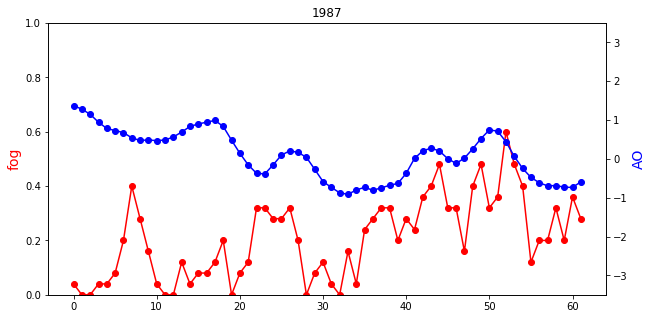

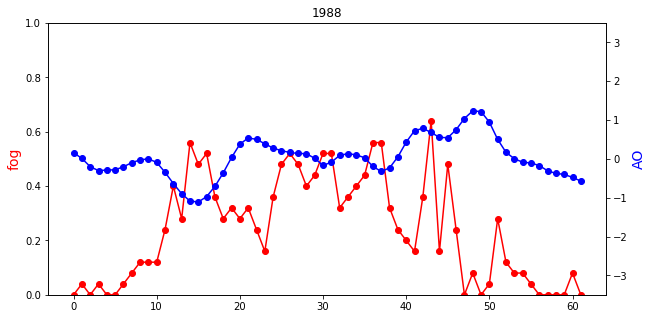

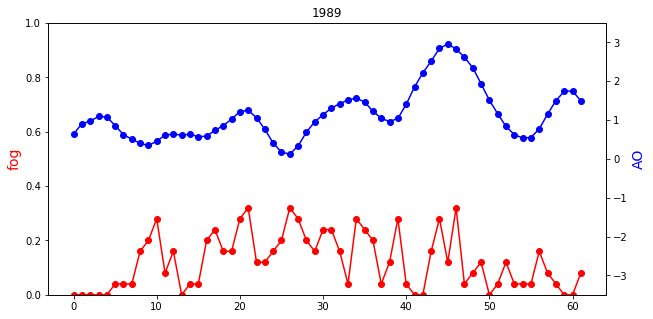

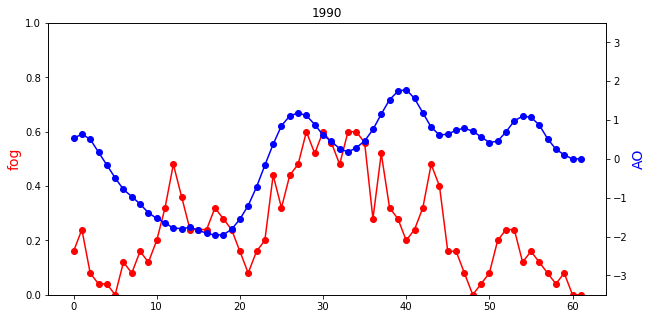

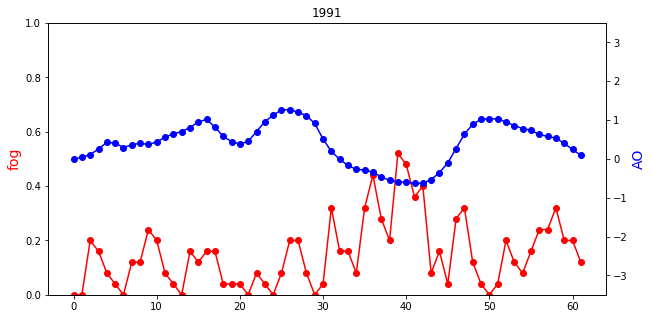

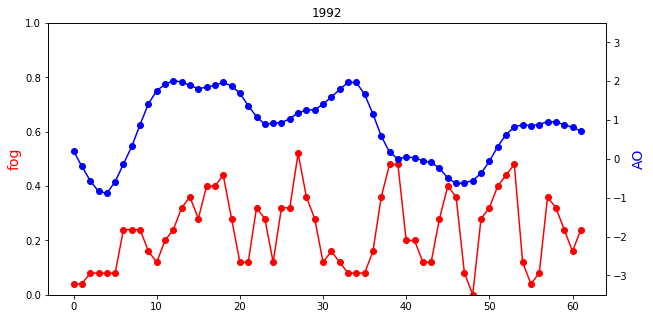

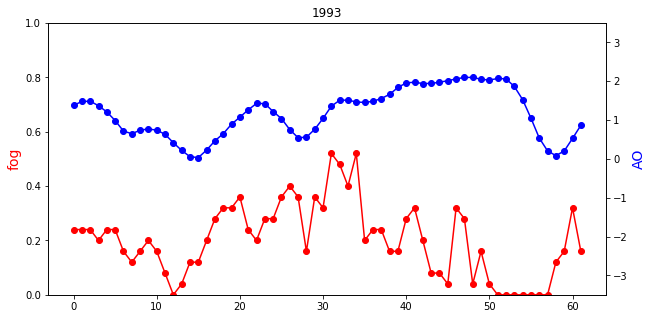

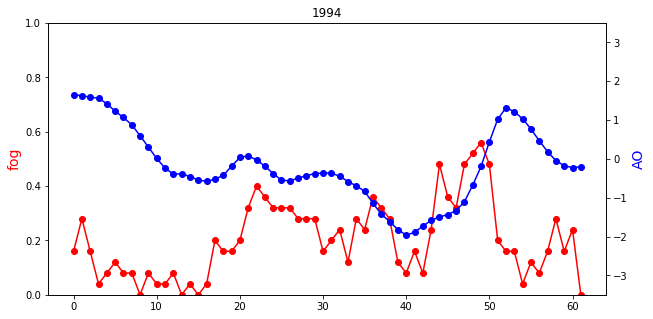

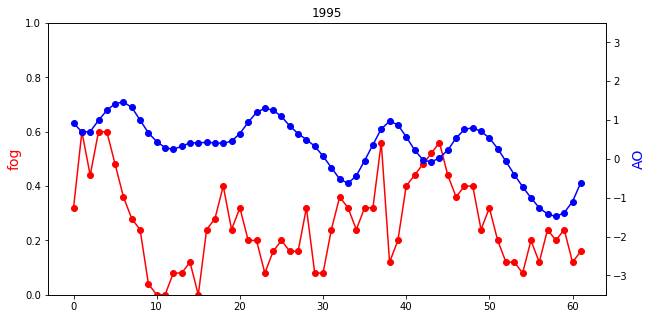

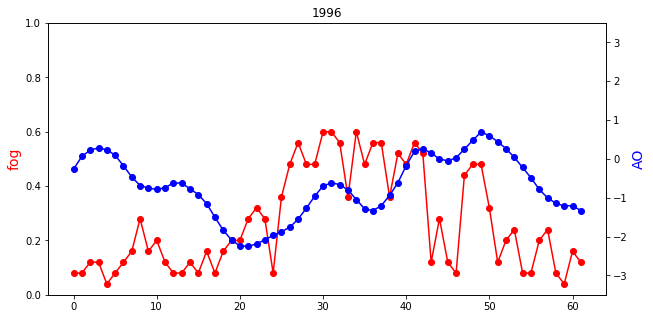

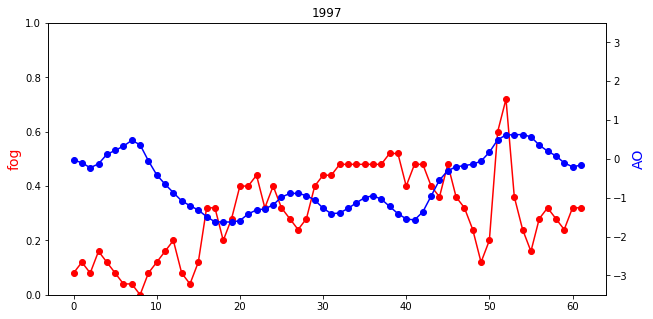

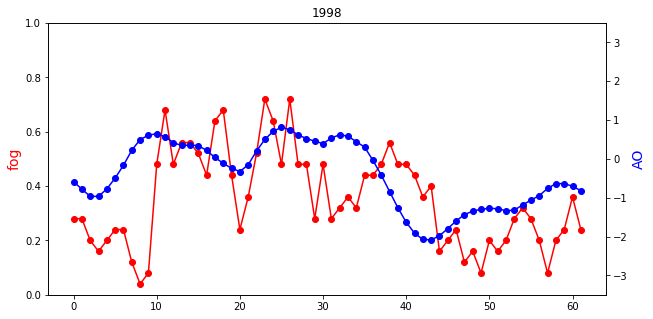

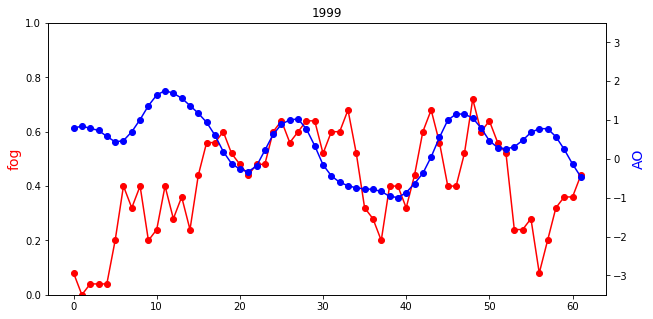

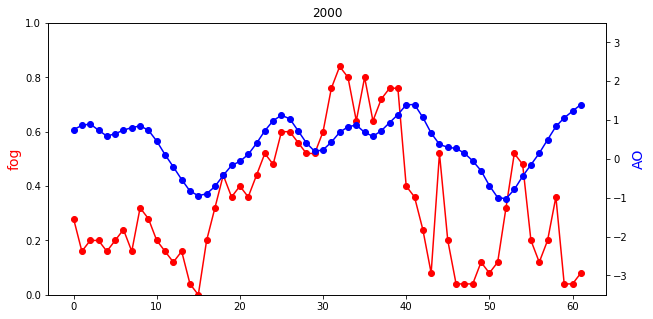

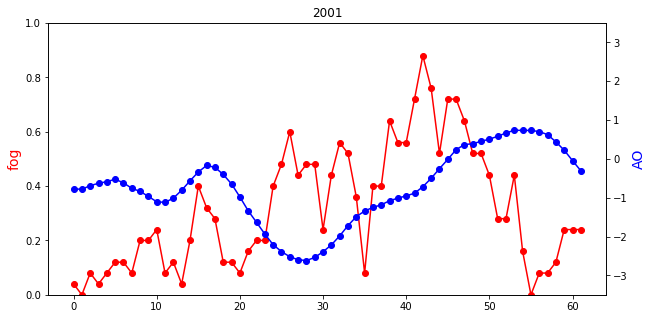

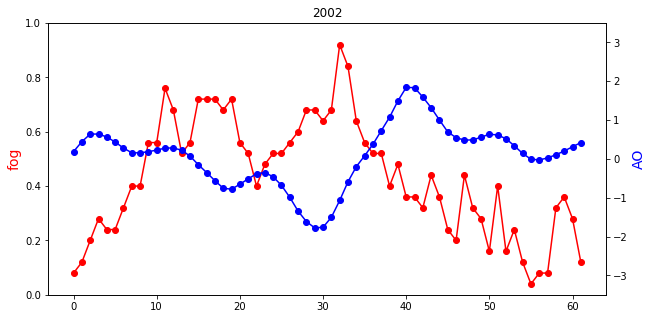

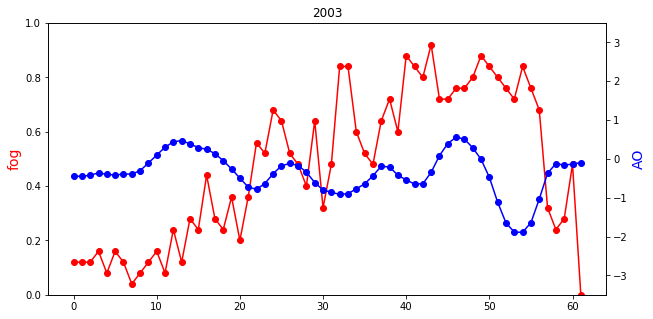

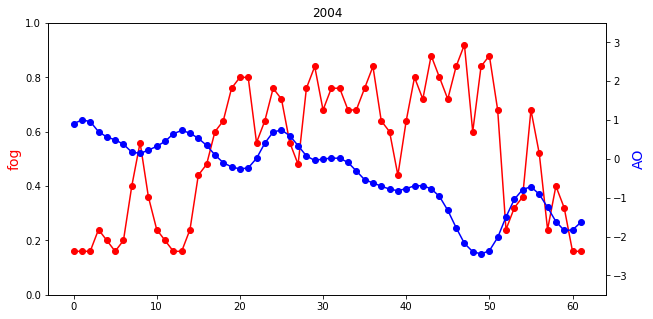

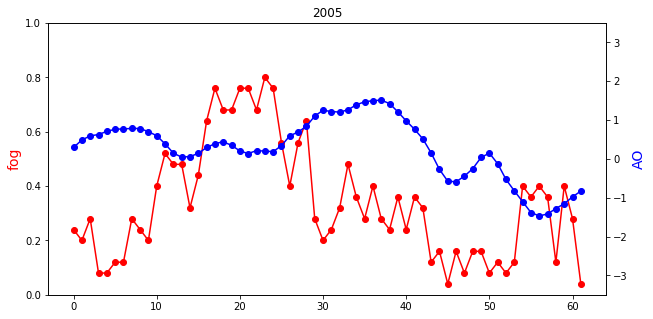

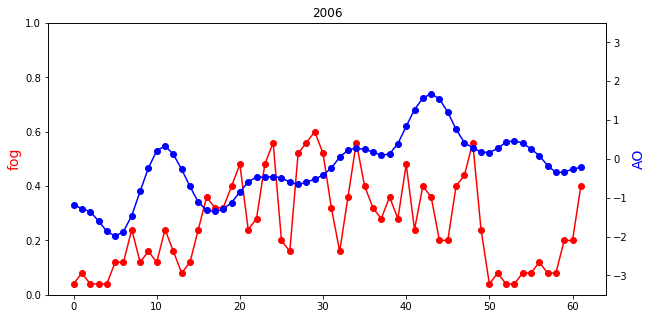

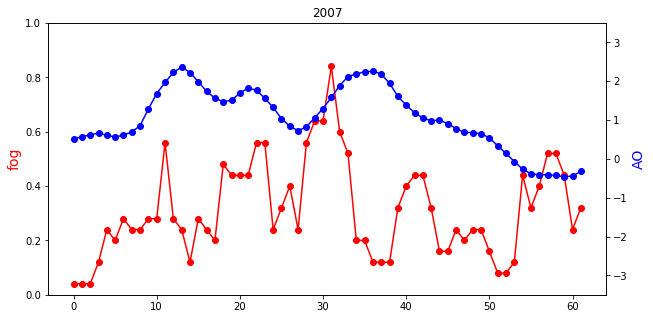

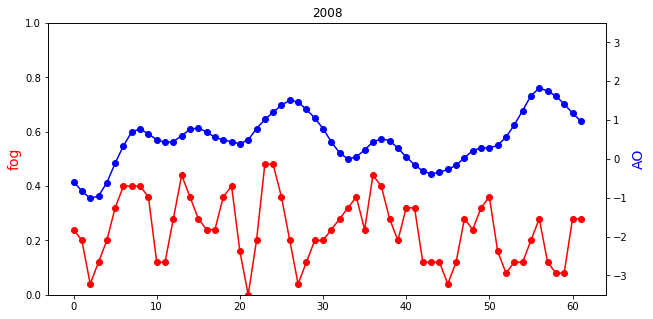

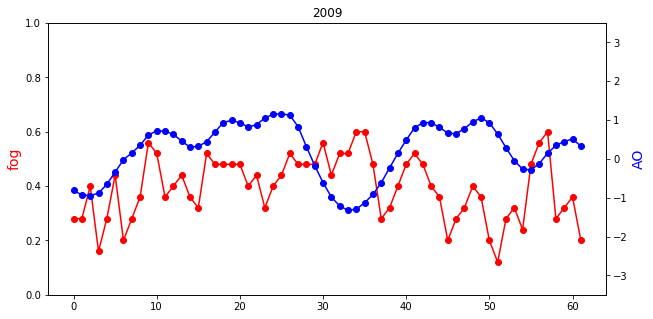

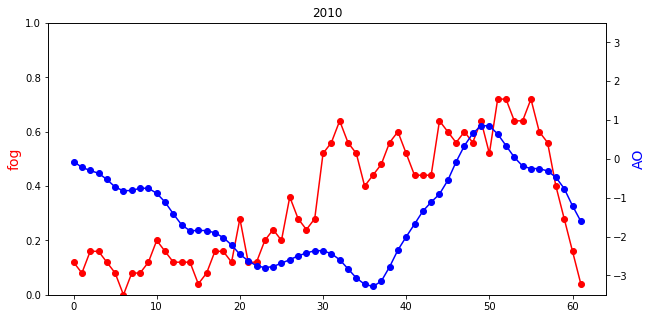

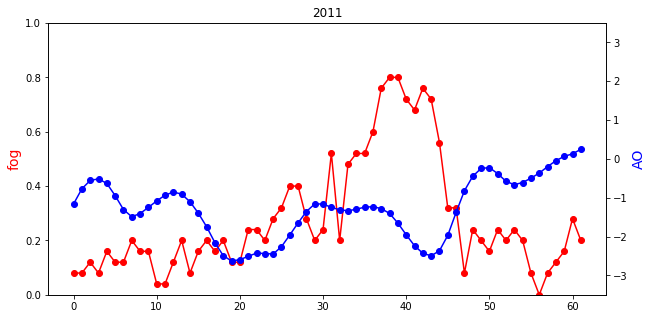

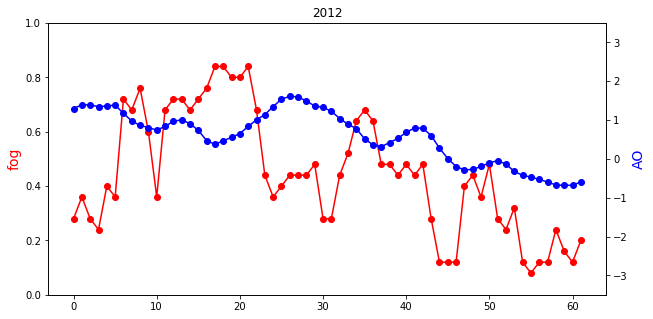

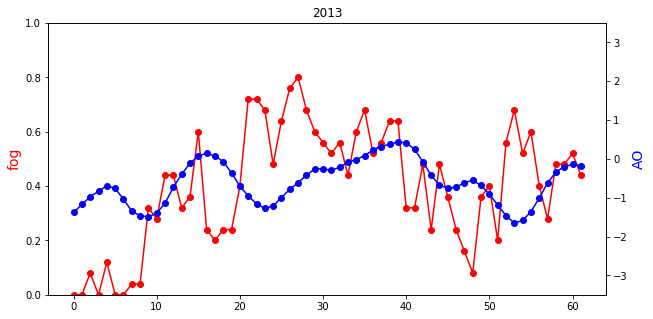

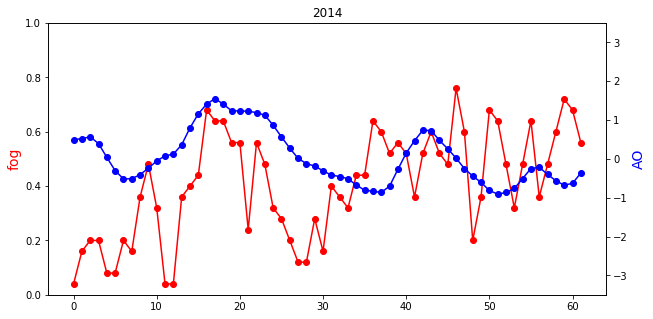

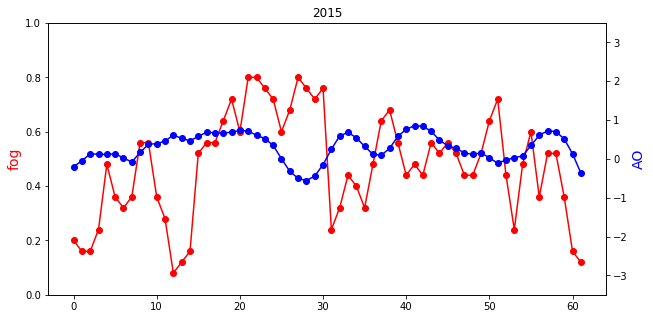

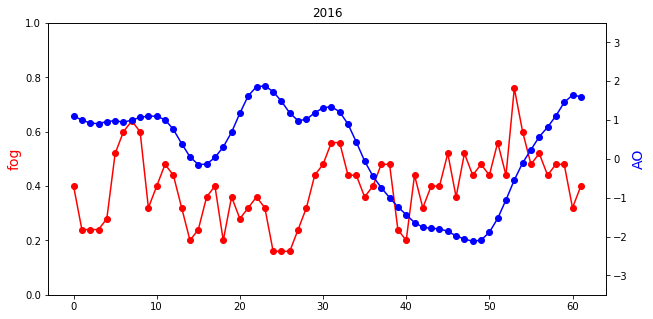

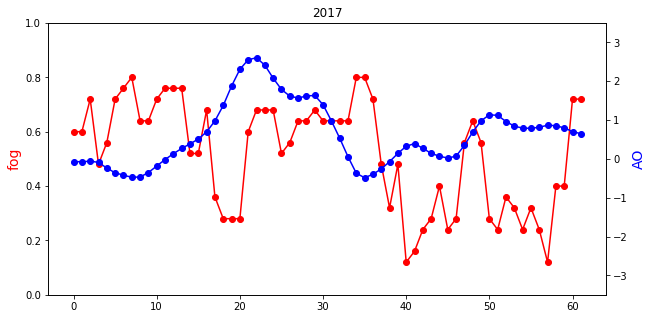

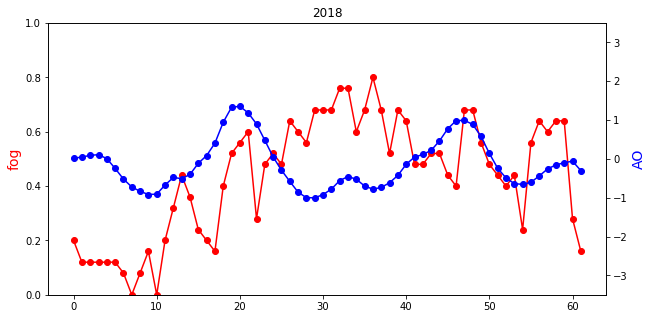

ValueError: x and y must have same first dimension, but have shapes (62,) and (31,)

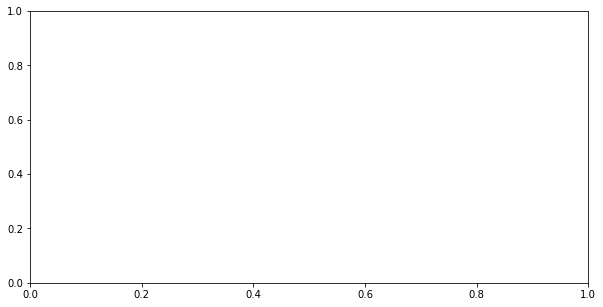

In [12]:
for yr in range(1981,2020,1):
    #print(yr)
    dStart=datetime.datetime(yr-1, 12, 1)
    #print(dStart)
    dEnd=datetime.datetime(yr, 1, 31)
    dEnd2=datetime.datetime(yr, 1, 31,9)
    #print(dEnd)
    obs1 = obs.sel(time=slice(dStart,dEnd))
    ao1  = FivedayMeanAO.sel(time=slice(dStart,dEnd2))
    fig,ax = plt.subplots(figsize=[10,5])
   # fig=plt.figure()
# make a plot
    ax.plot(days, obs1, color="red", marker="o")
# set x-axis label
    #ax.set_xlabel("year",fontsize=14)a
# set y-axis label
    ax.set_ylabel("fog",color="red",fontsize=14)
    ax.set_ylim([0, 1])
    ax2=ax.twinx()
    ax2.plot(days, ao1,color="blue",marker="o")
    ax2.set_ylim([-3.5, 3.5])
    ax2.set_ylabel("AO",color="blue",fontsize=14)
    plt.title(yr)
    plt.pause(0.05)

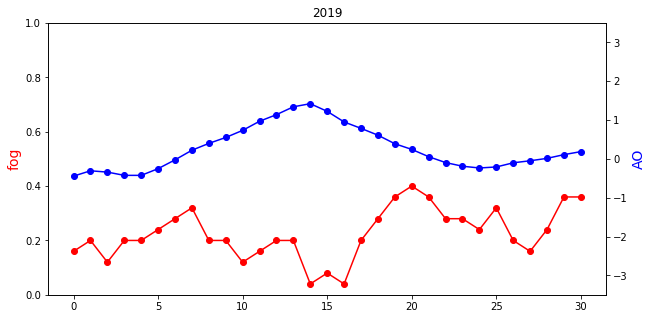

In [13]:
days=np.arange(31)
for yr in range(2019,2020,1):
    #print(yr)
    dStart=datetime.datetime(yr-1, 12, 1)
    #print(dStart)
    dEnd=datetime.datetime(yr-1, 12, 31)
    dEnd2=datetime.datetime(yr-1, 12, 31,9)
    #print(dEnd)
    obs1 = obs.sel(time=slice(dStart,dEnd))
    ao1  = FivedayMeanAO.sel(time=slice(dStart,dEnd2))
    fig,ax = plt.subplots(figsize=[10,5])
   # fig=plt.figure()
# make a plot
    ax.plot(days, obs1, color="red", marker="o")
# set x-axis label
    #ax.set_xlabel("year",fontsize=14)a
# set y-axis label
    ax.set_ylabel("fog",color="red",fontsize=14)
    ax.set_ylim([0, 1])
    ax2=ax.twinx()
    ax2.plot(days, ao1,color="blue",marker="o")
    ax2.set_ylim([-3.5, 3.5])
    ax2.set_ylabel("AO",color="blue",fontsize=14)
    plt.title(yr)
    plt.pause(0.05)

ValueError: the first argument to .sel must be a dictionary

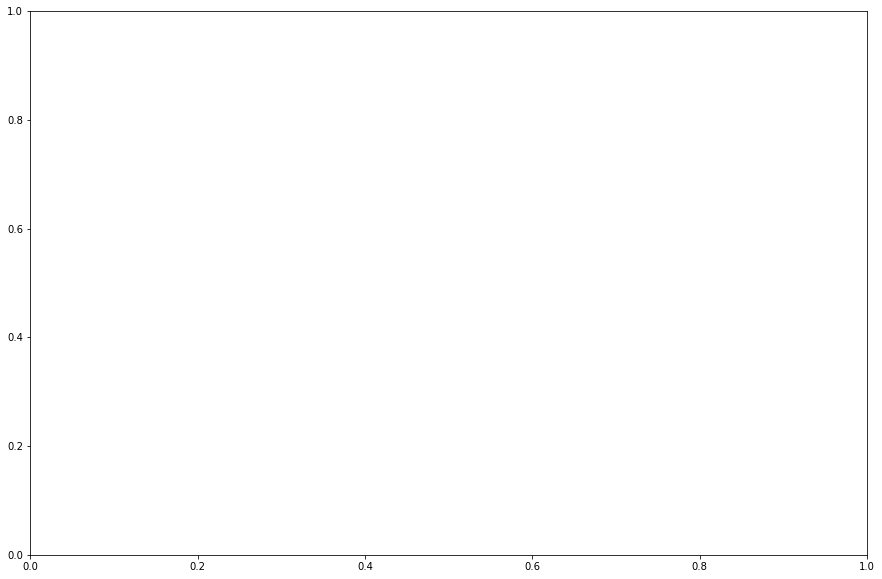

In [14]:
fig1, ax1 = plt.subplots(figsize=(15,10))
for yr in range(1981,2019,1):
    #print(yr)
    dStart=datetime.datetime(yr-1, 12, 1)
    #print(dStart)
    dEnd=datetime.datetime(yr, 1, 31)
    dEnd2=datetime.datetime(yr, 1, 31,9)
    #print(dEnd)
    obs1 = obs.sel(time=slice(dStart,dEnd))[obs.sel(time=slice(dStart,dEnd))>=0.48]
    ao1  = FivedayMeanAO.sel(time=slice(dStart,dEnd2)).sel(obs1)
    eu1  = eu.sel(time=slice(dStart,dEnd2))[obs.sel(time=slice(dStart,dEnd))>=0.48]
    ax1.scatter(ao1, eu1, s=200, c=obs1, cmap='jet')
    
    #print(obs1.time)
    #print(ao1.time)
plt.show()    

In [15]:
sstTS

<xarray.DataArray 'sst' (time: 3772)>
array([-0.4880979 , -0.44343382, -0.2990194 , ...,  0.5244897 ,
        0.55263877,  0.56157446], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1979-01-01T09:00:00 ... 2019-12-31T09:00:00

In [16]:
yfog=obs[obs>=0.6]
AO5D=FivedayMeanAO.sel(time=yfog.time , method="nearest")
EU5D=FivedayMeanEU.sel(time=yfog.time , method="nearest")
SST5D=FivedayMeanSST.sel(time=yfog.time , method="nearest")

cList=[]
for f in SST5D :
    if(f <= -1.0):
       cList.append(100)
    elif (f < 0):
       cList.append(200)
    elif (f >= 1):
       cList.append(400)
    elif (f >0 ):
       cList.append(300)

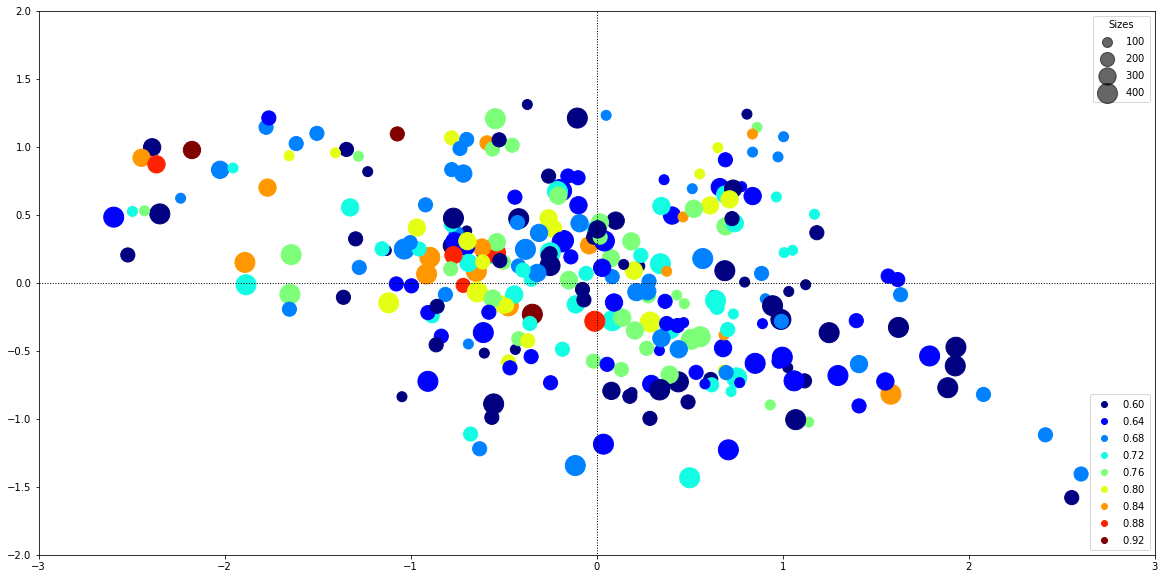

In [17]:
x1=(-3,3)
y1=(0,0)
x2=(0,0)
y2=(-3,3)
fig, ax = plt.subplots( figsize=(20,10))

scatter=plt.scatter(AO5D, EU5D,s=cList,  c=yfog, cmap='jet')
# produce a legend with the unique colors from the scatter
plt.xlim(-3, 3)
plt.ylim(-2, 2)
plt.plot(x1,y1, linestyle = ":", lw=1,color = 'black')
plt.plot(x2,y2, linestyle = ":", lw=1,color = 'black')
legend1 = ax.legend(*scatter.legend_elements(), loc="lower right")
ax.add_artist(legend1)
# produce a legend with a cross section of sizes from the scatter
handles, labels = scatter.legend_elements(prop="sizes", alpha=0.6)
legend2 = ax.legend(handles, labels, loc="upper right", title="Sizes")



In [18]:
wFDaylist=[]
AONeg=[]
for yr in range(1981,2019,1):
    #print(yr)
    dStart=datetime.datetime(yr-1, 12, 1)
    #print(dStart)
    dEnd=datetime.datetime(yr, 1, 31)
    dEnd2=datetime.datetime(yr, 1, 31,9)
    fg=obs.sel(time=slice(dStart,dEnd))[obs.sel(time=slice(dStart,dEnd))>=0.48].shape[0]
    wFDaylist.append(fg)
    yfog=obs.sel(time=slice(dStart,dEnd))[obs.sel(time=slice(dStart,dEnd))>=0.48]
    aoneg=FivedayMeanAO.sel(time=yfog.time , method="nearest")[FivedayMeanAO.sel(time=yfog.time , method="nearest")<0].shape[0]
    AONeg.append(aoneg)
    print(yr)
    print(fg)
    print(aoneg)

1981
0
0
1982
0
0
1983
7
0
1984
1
0
1985
1
1
1986
2
2
1987
4
0
1988
12
7
1989
0
0
1990
12
1
1991
2
2
1992
4
1
1993
3
0
1994
5
4
1995
8
2
1996
17
13
1997
13
11
1998
20
5
1999
27
9
2000
20
2
2001
18
14
2002
29
19
2003
34
29
2004
38
26
2005
16
0
2006
10
7
2007
12
2
2008
2
0
2009
23
9
2010
23
16
2011
13
13
2012
26
1
2013
28
22
2014
29
16
2015
35
6
2016
20
8
2017
40
16
2018
34
21


In [19]:
np.corrcoef(wFDaylist,AONeg)

array([[1.        , 0.78413761],
       [0.78413761, 1.        ]])